In [8]:
#setwd("C:/Users/acarrillo30/Downloads/2018-3/Programación")
library(RColorBrewer)
palette(brewer.pal(8,"Set1"))

agendados=read.csv2("programacion.csv")
str(agendados)
table(agendados$Espacio)

event_inic=strptime(paste(agendados$Fecha.1,agendados$h_inic), "%d/%m/%Y %H:%M:%S")
event_fin=strptime(paste(agendados$Fecha.1,agendados$h_fin), "%d/%m/%Y %H:%M:%S")
num_esp=as.numeric(agendados$Espacio)

'data.frame':	165 obs. of  16 variables:
 $ Semana..Program     : int  13 13 13 13 13 13 13 13 13 13 ...
 $ Grupo               : Factor w/ 55 levels "PS0052_201","PS0052_202",..: 2 13 18 22 27 28 32 35 37 39 ...
 $ Espacio             : Factor w/ 3 levels "Auxiliar","Gesell",..: 1 2 2 1 2 1 2 1 2 1 ...
 $ Fecha               : Factor w/ 44 levels "jueves, 1 de noviembre de 2018",..: 21 21 21 21 4 4 4 4 4 4 ...
 $ Sugerencia..Espacio : Factor w/ 3 levels "Auxiliar","Gesell",..: 1 2 2 2 2 2 1 1 1 1 ...
 $ Semana..Programación: int  13 13 13 13 13 13 13 13 13 13 ...
 $ Fecha.1             : Factor w/ 44 levels "1/10/2018","1/11/2018",..: 13 13 13 13 16 16 16 16 16 16 ...
 $ Día                 : Factor w/ 5 levels "Jueves","Lunes",..: 3 3 3 3 1 1 1 1 1 1 ...
 $ h_inic              : Factor w/ 9 levels "10:00:00","10:45:00",..: 7 9 5 5 8 8 2 2 3 3 ...
 $ h_fin               : Factor w/ 9 levels "10:00:00","10:45:00",..: 1 3 8 8 2 2 5 5 6 6 ...
 $ grupo               : int  202 402 423 421


Auxiliar   Gesell Sistemas 
      54       78       33 

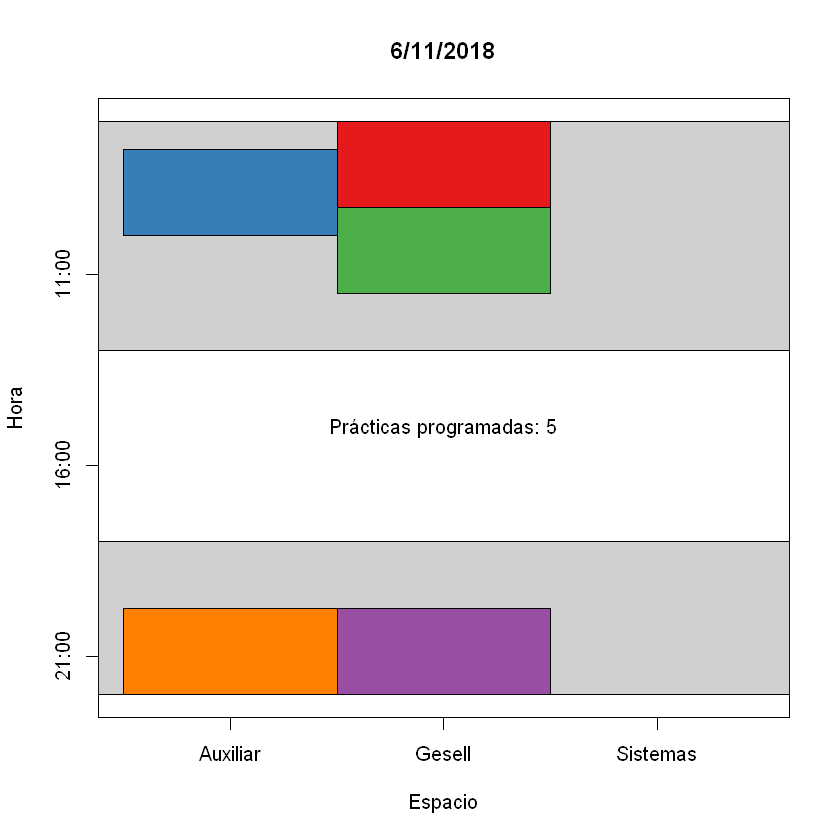

In [14]:
dia="6/11/2018"
plot(y=strptime(paste(dia,"7:00:01"), "%d/%m/%Y %H:%M:%S"), x=2,pch=16,
     ylim=c(as.POSIXct(paste(dia,"22:00:00"), format="%d/%m/%Y %H:%M:%S"),
            as.POSIXct(paste(dia,"7:00:00"), format="%d/%m/%Y %H:%M:%S")),
     xlim=c(.5,3.5), col="white", main=dia, xlab="Espacio", ylab="Hora",xaxt = 'n')
axis(labels=levels(agendados$Espacio),
     side = 1,
     at=1:3)

rect(0,as.POSIXct(paste(dia,"13:00:00"), format="%d/%m/%Y %H:%M:%S"),
     4,as.POSIXct(paste(dia,"7:00:00"), format="%d/%m/%Y %H:%M:%S"),col=rgb(.25,.25,.25,.25))
rect(0,as.POSIXct(paste(dia,"22:00:00"), format="%d/%m/%Y %H:%M:%S"),
     4,as.POSIXct(paste(dia,"18:00:00"), format="%d/%m/%Y %H:%M:%S"),col=rgb(.25,.25,.25,.25))
pracs_dia=event_inic>=as.POSIXct(paste(dia,"6:30:00"), format="%d/%m/%Y %H:%M:%S")&
event_inic<=as.POSIXct(paste(dia,"22:00:00"), format="%d/%m/%Y %H:%M:%S")
ev_inic=event_inic[pracs_dia]
ev_fin=event_fin[pracs_dia]
spac=agendados$Espacio[pracs_dia]
for (i in 1:length(pracs_dia)){
    rect(as.numeric(spac[i])-.5,ev_fin[i],
         as.numeric(spac[i])+.5,ev_inic[i],col=i)

#     lines(y=c(ev_inic[i],ev_fin[i]),x=c(spac[i],spac[i]), col=i, lwd=5)
#     points(y=ev_inic[i],x=spac[i], pch=2, col=i)
#     points(y=ev_fin[i],x=spac[i], pch=6, col=i)
}
text(2,strptime(paste(dia,"15:00:00"), "%d/%m/%Y %H:%M:%S"),paste("Prácticas programadas:",sum(pracs_dia)))


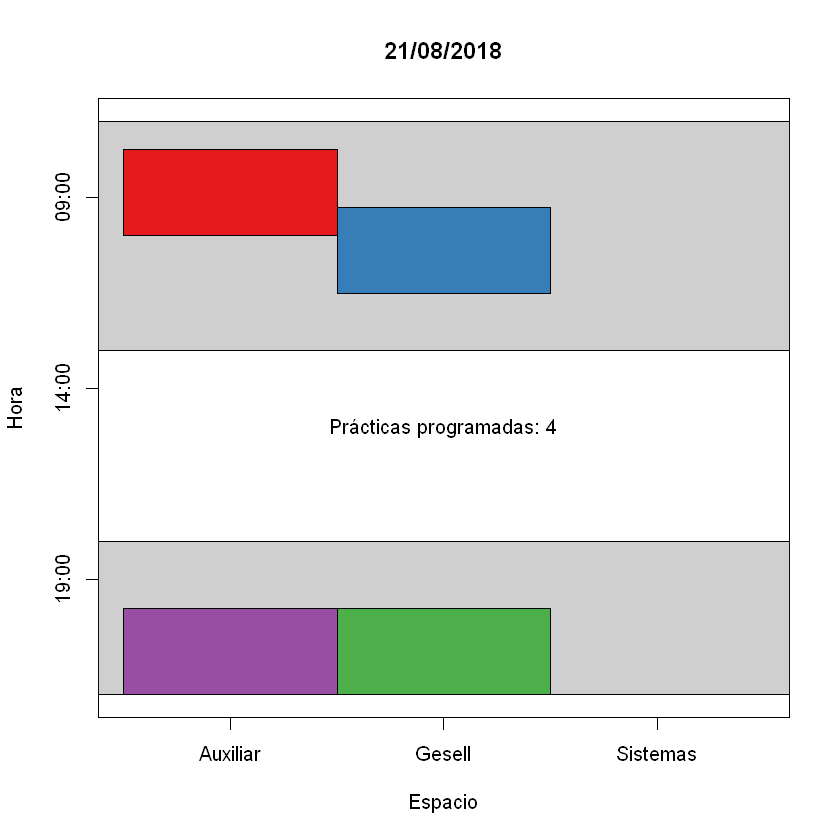

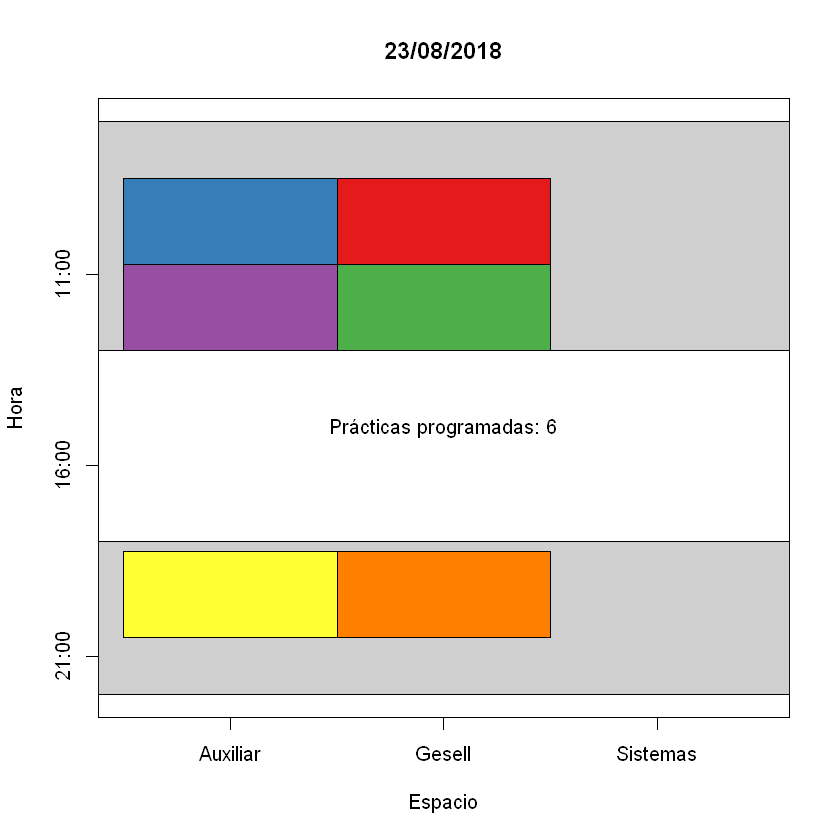

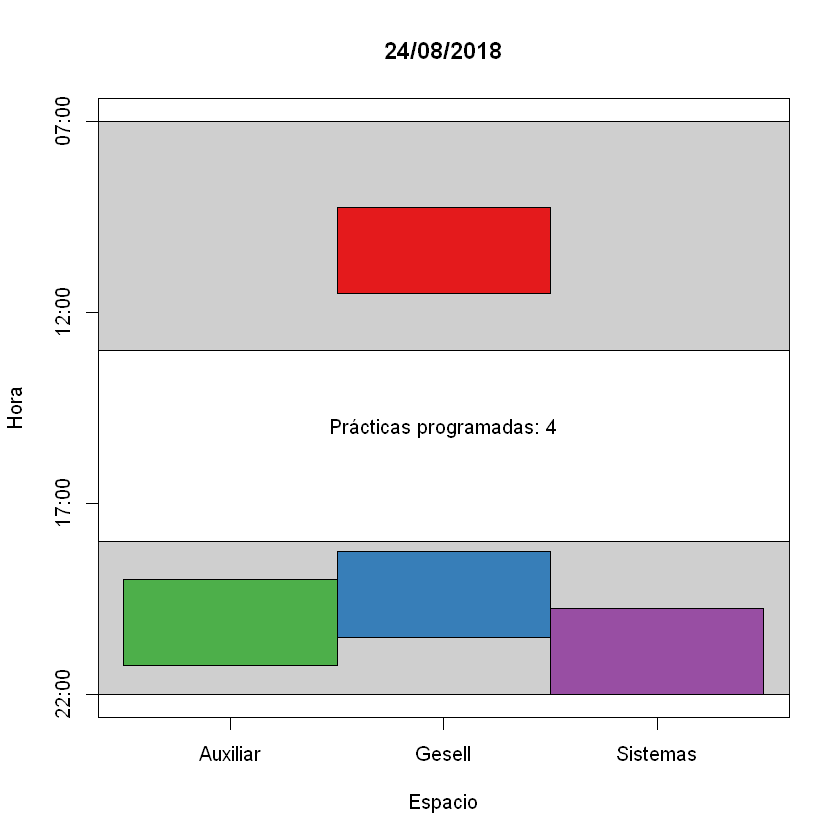

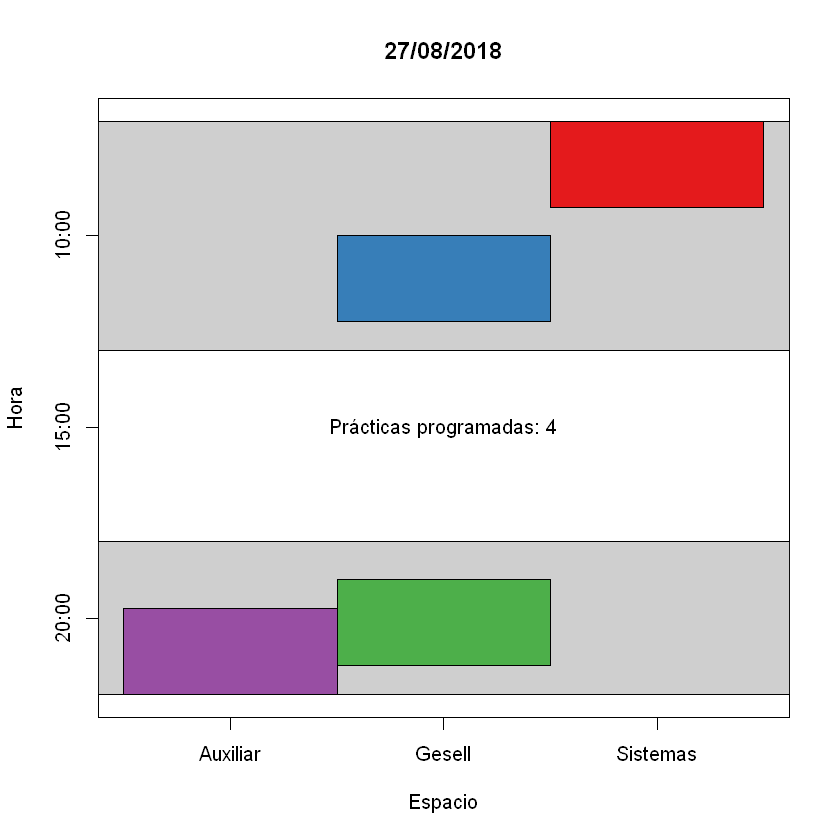

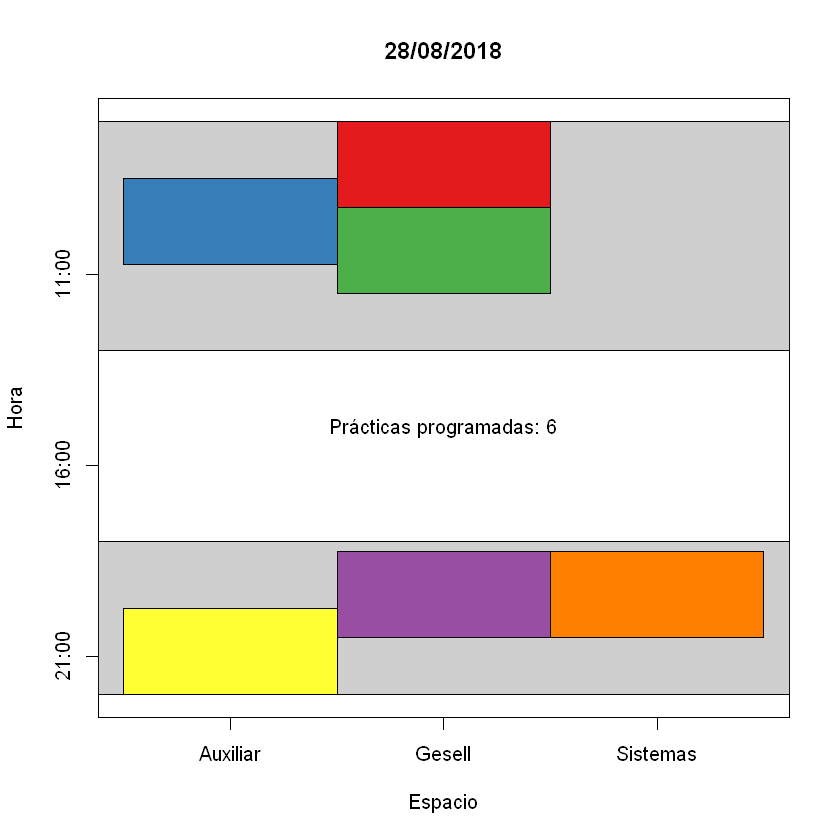

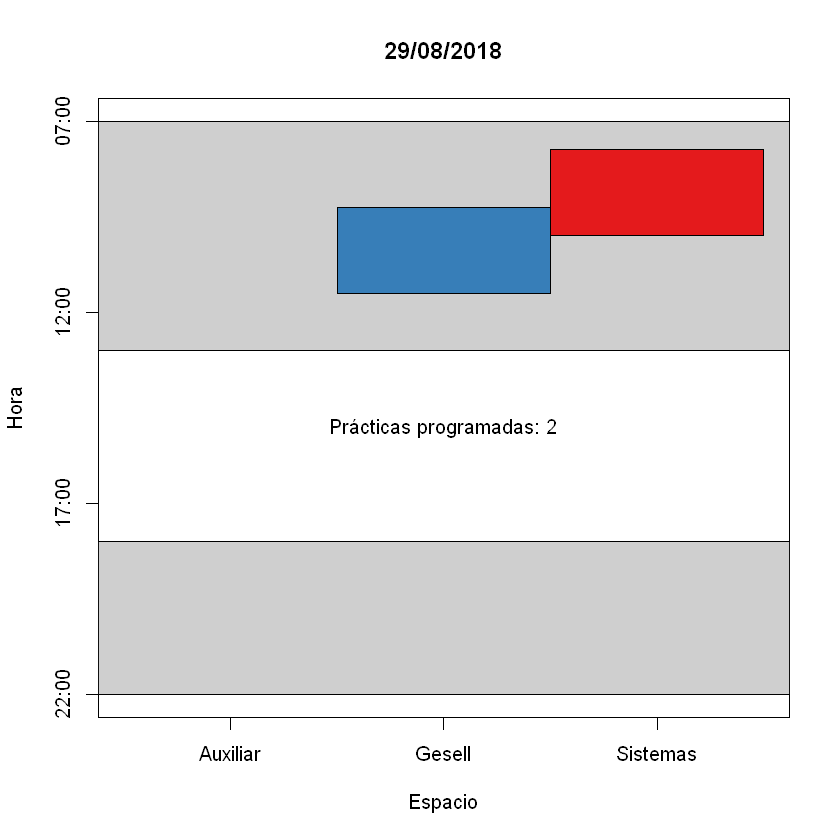

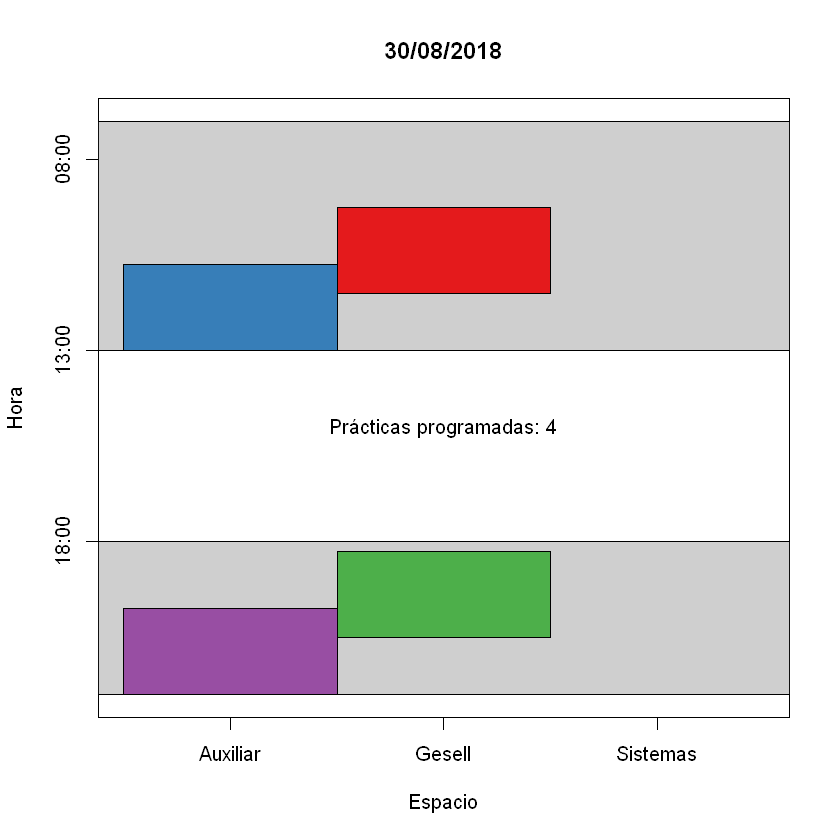

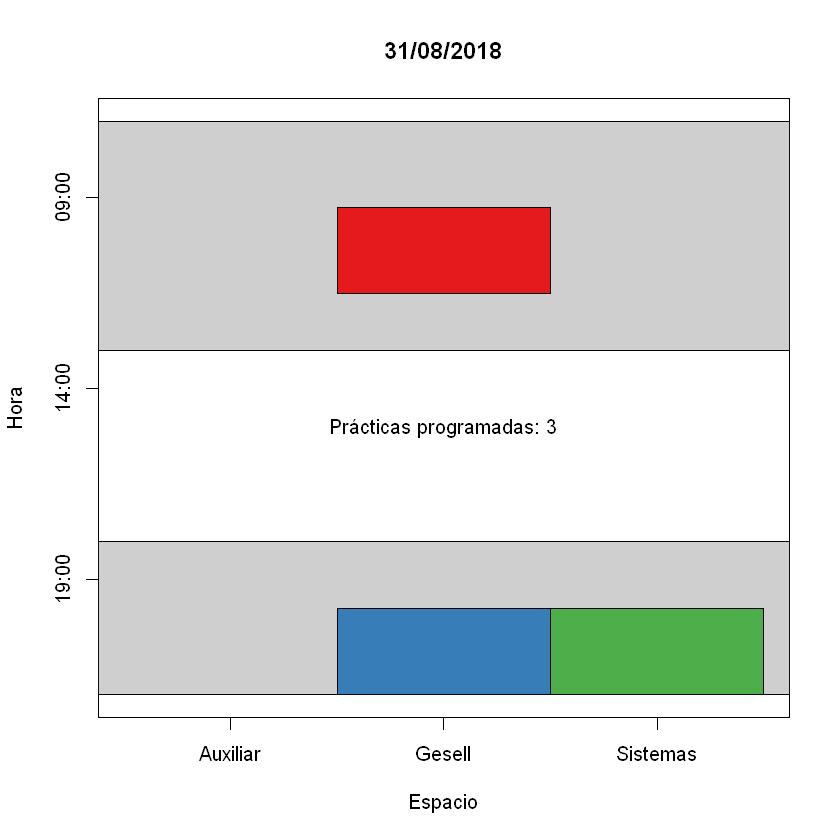

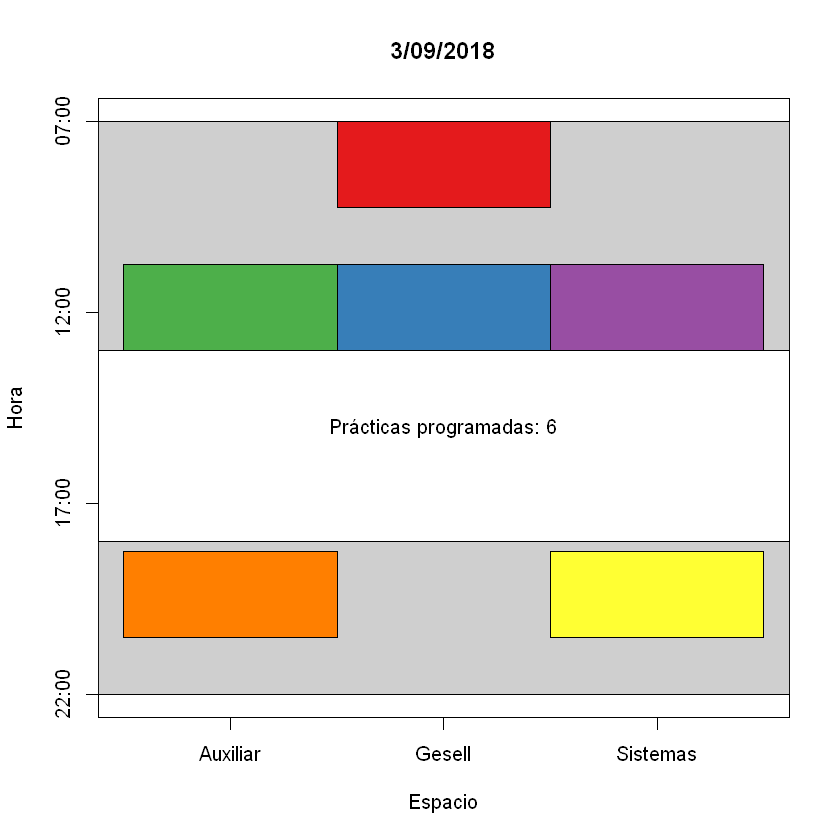

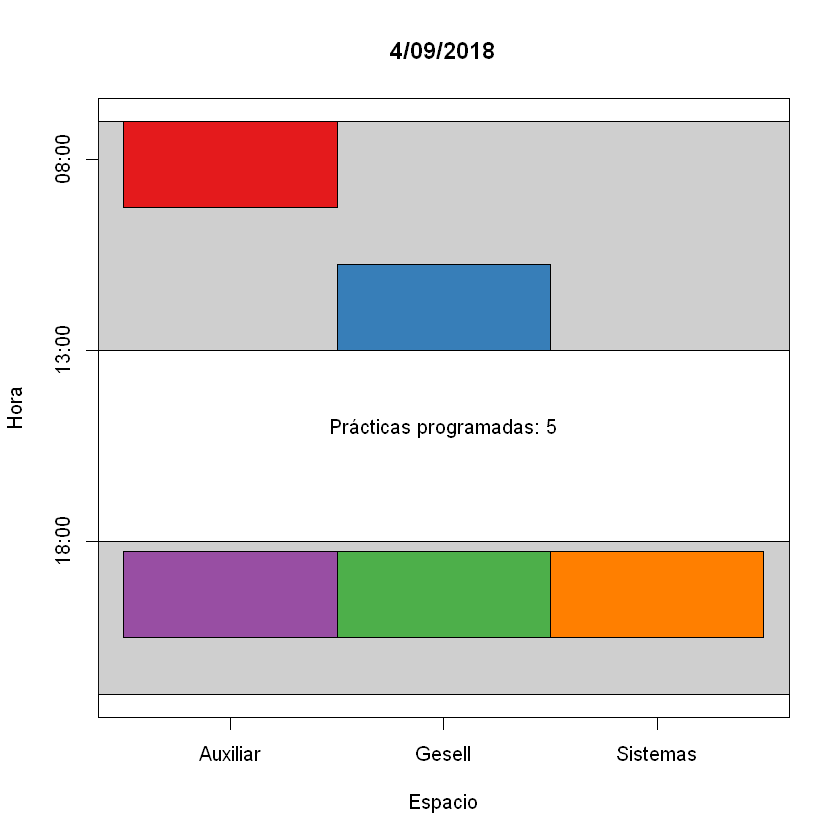

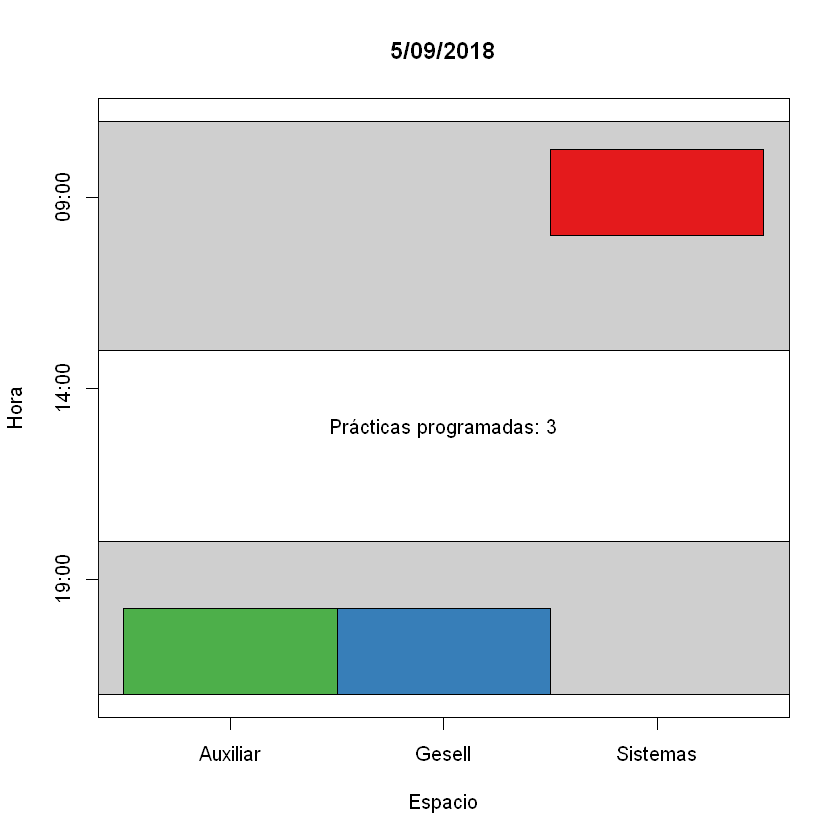

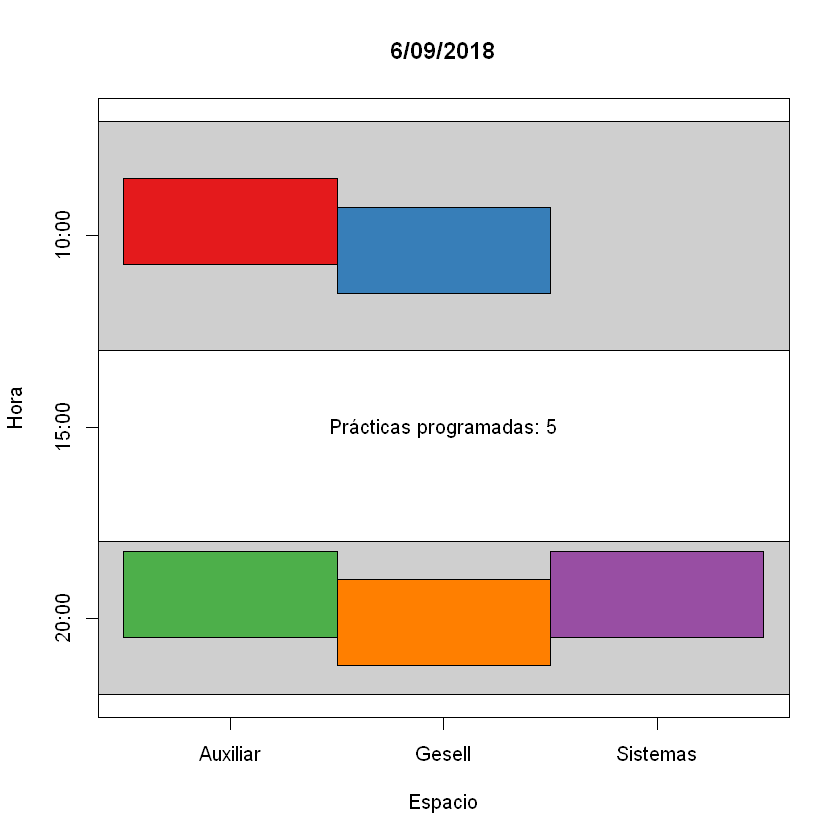

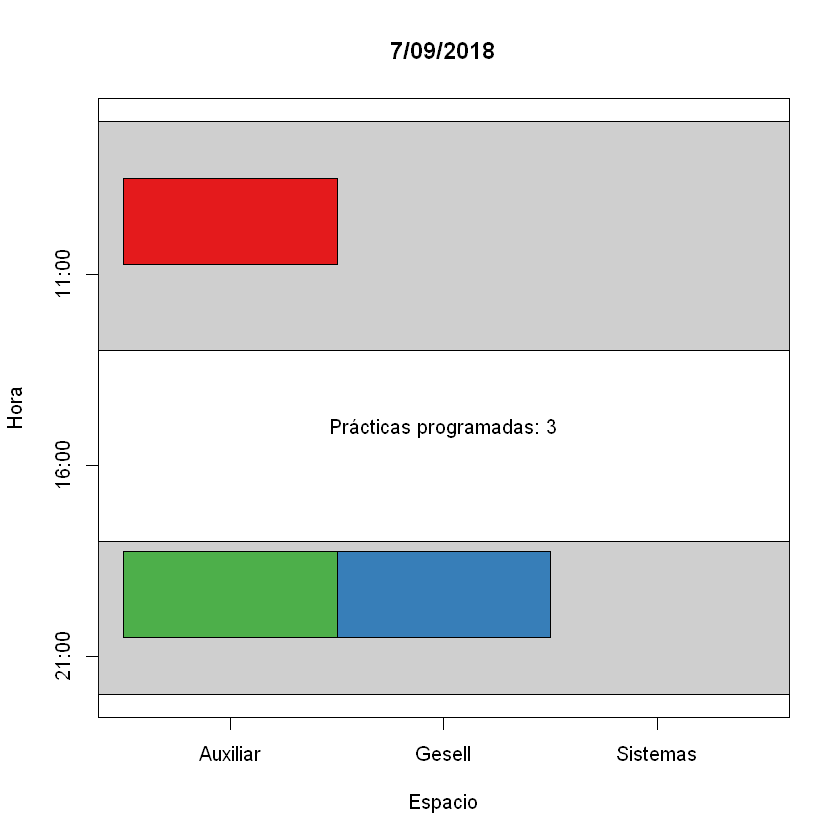

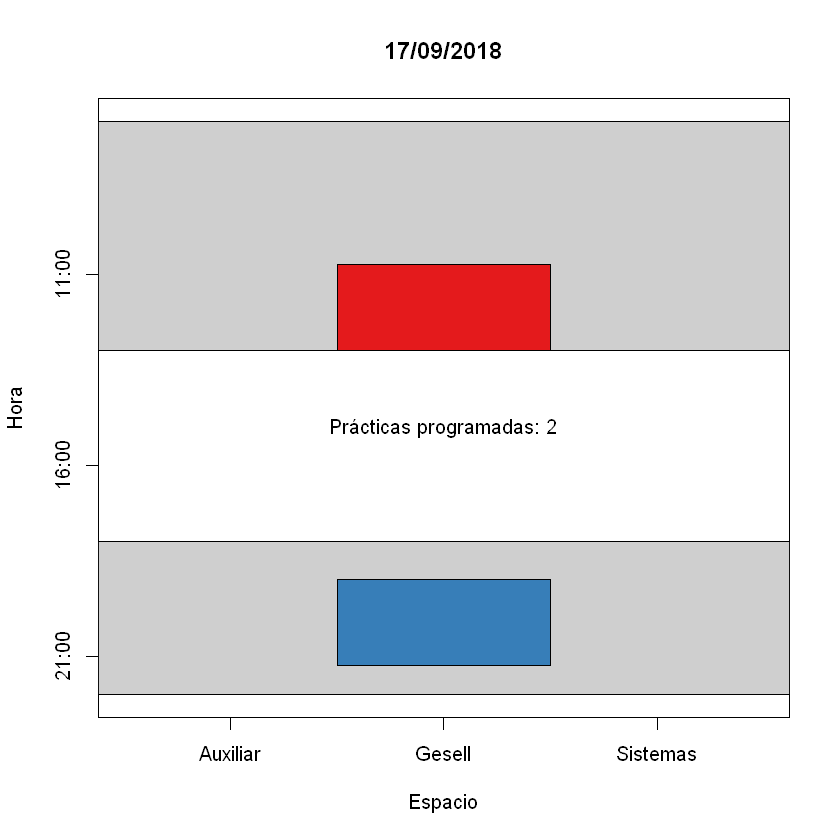

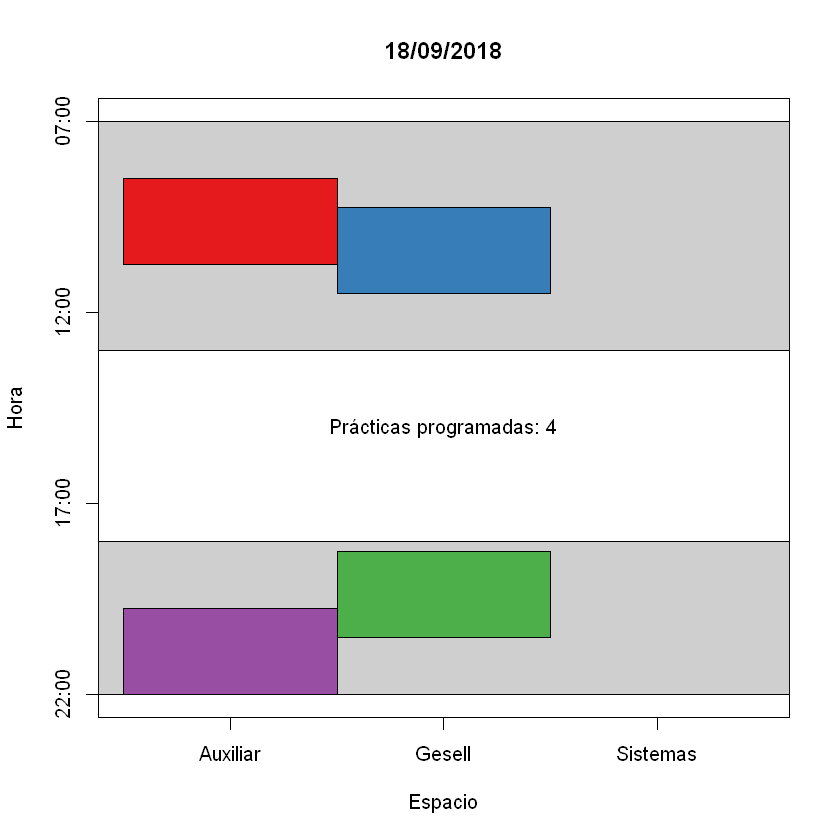

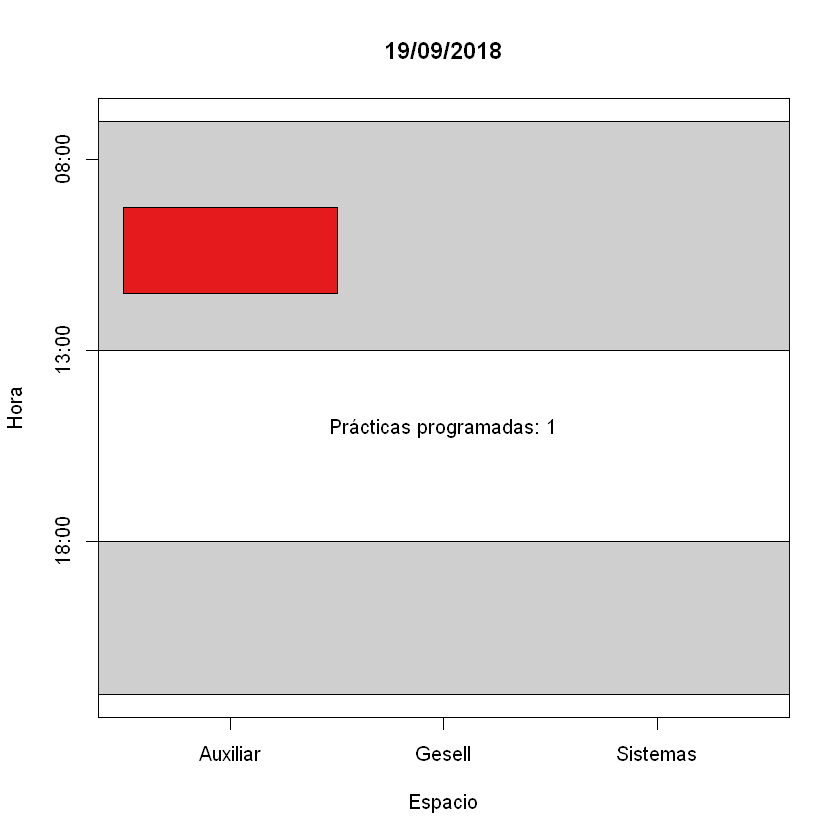

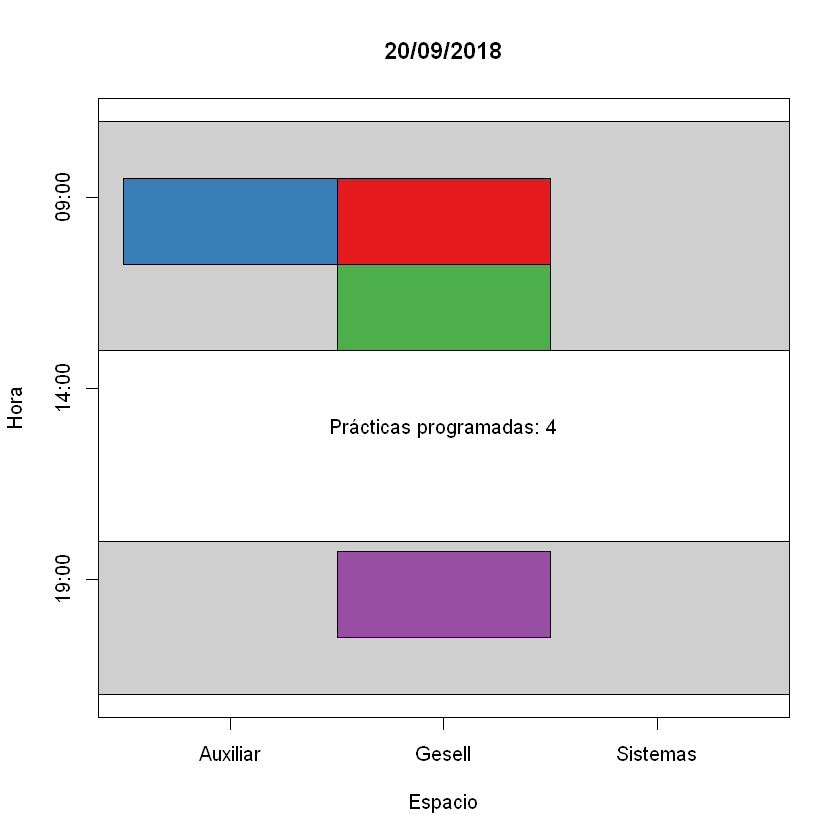

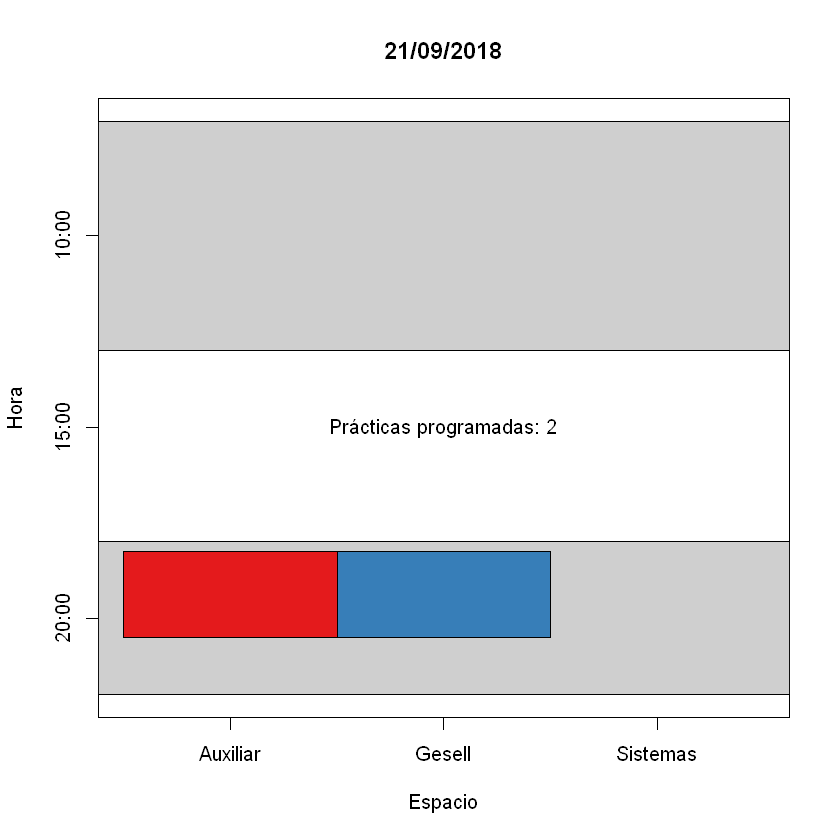

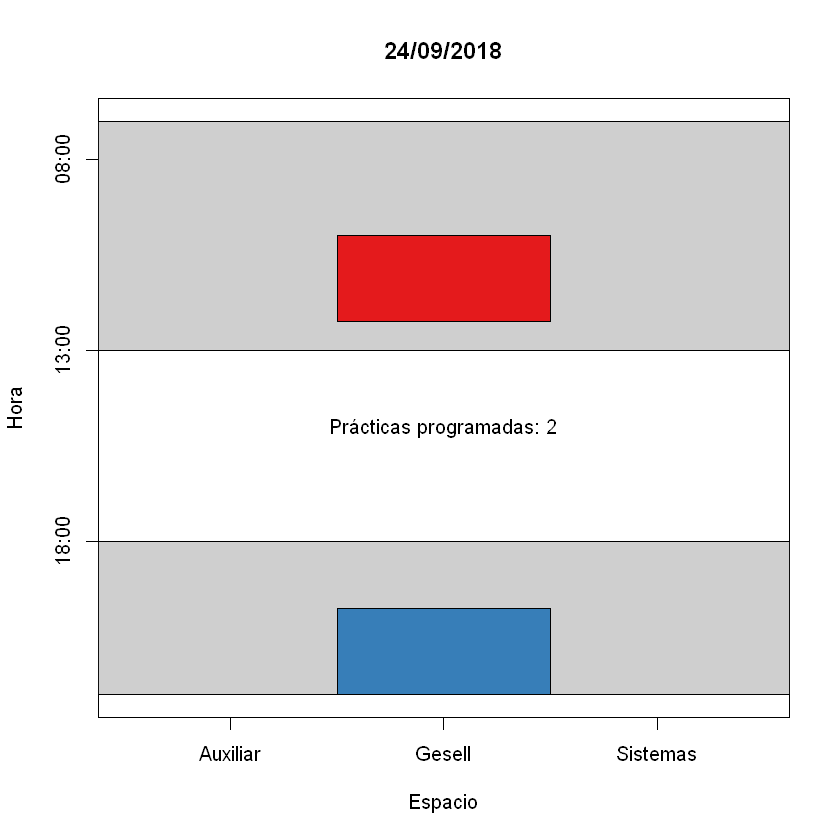

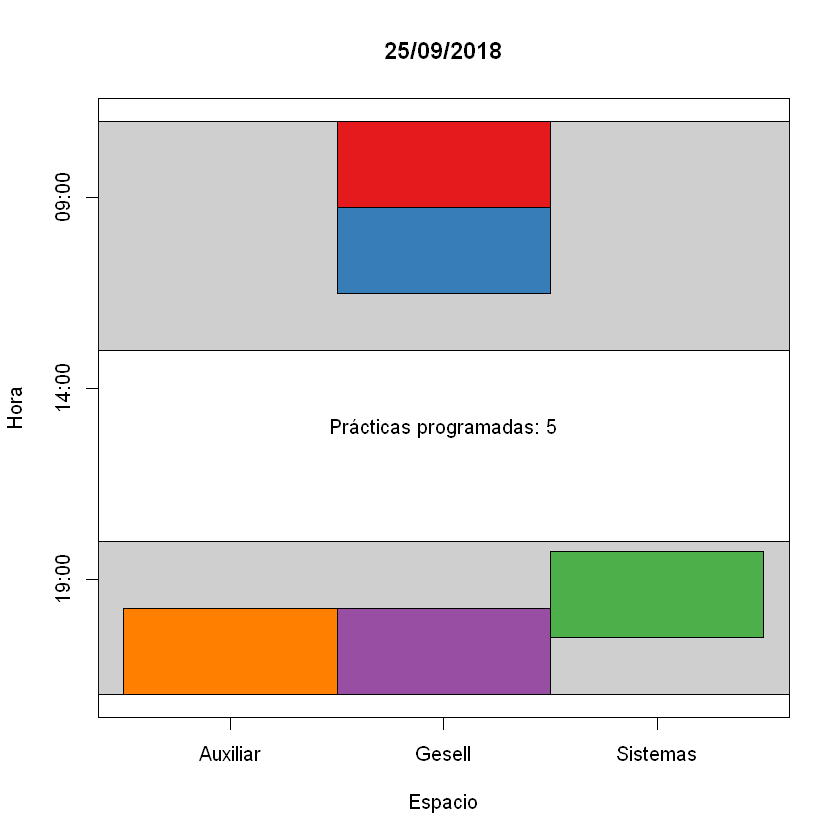

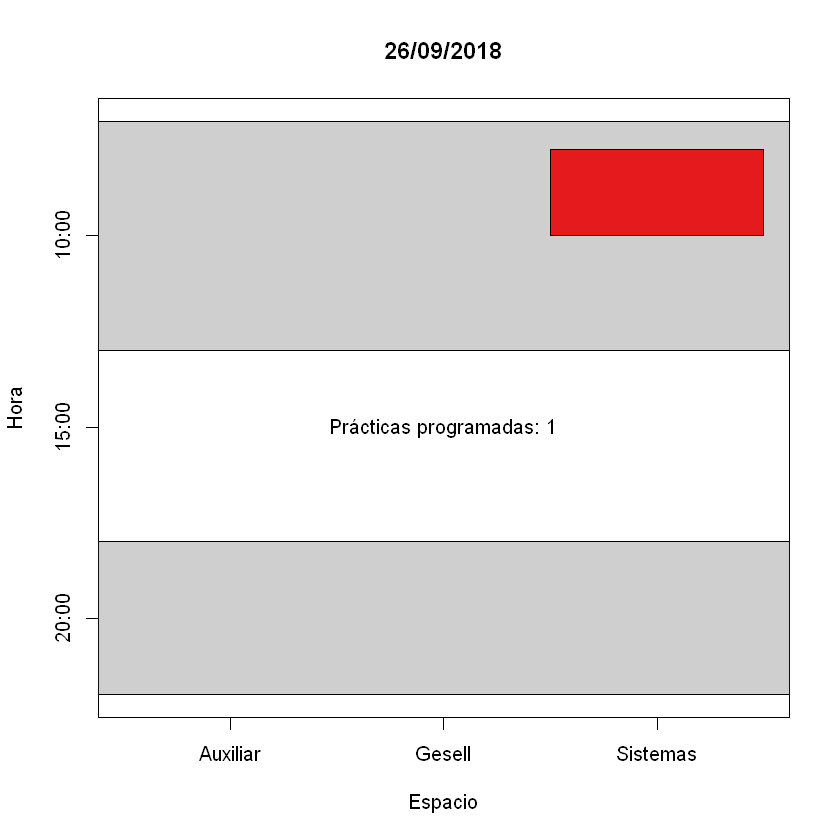

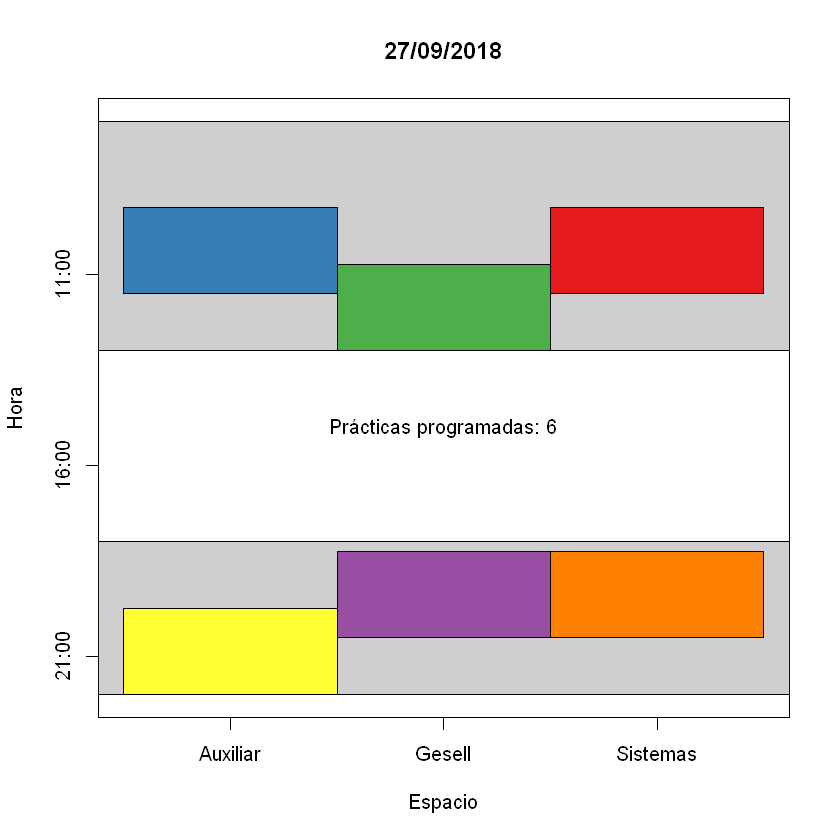

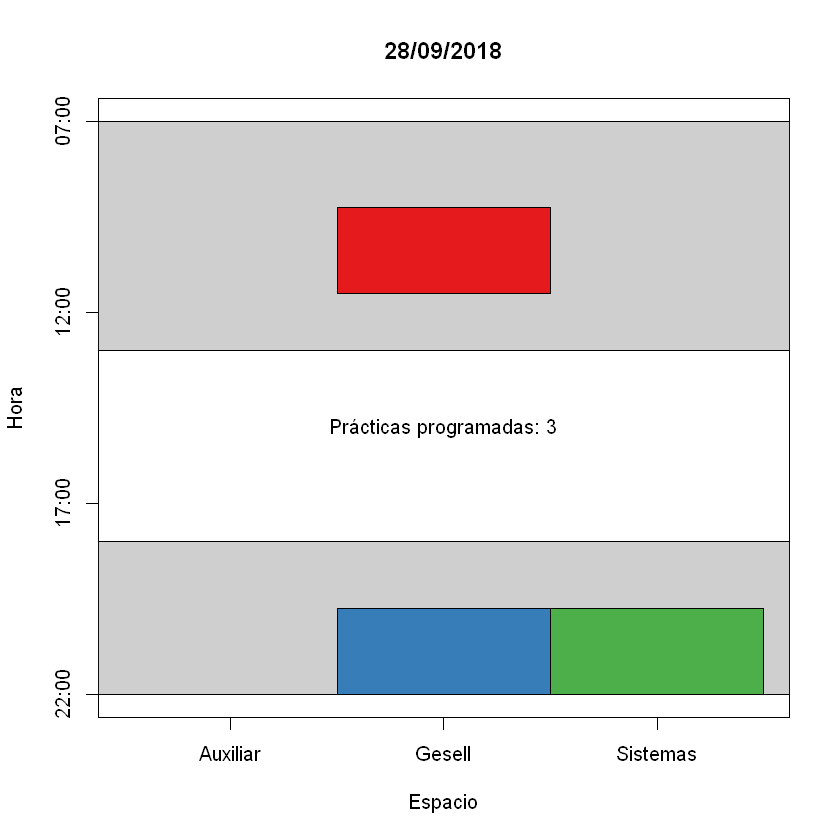

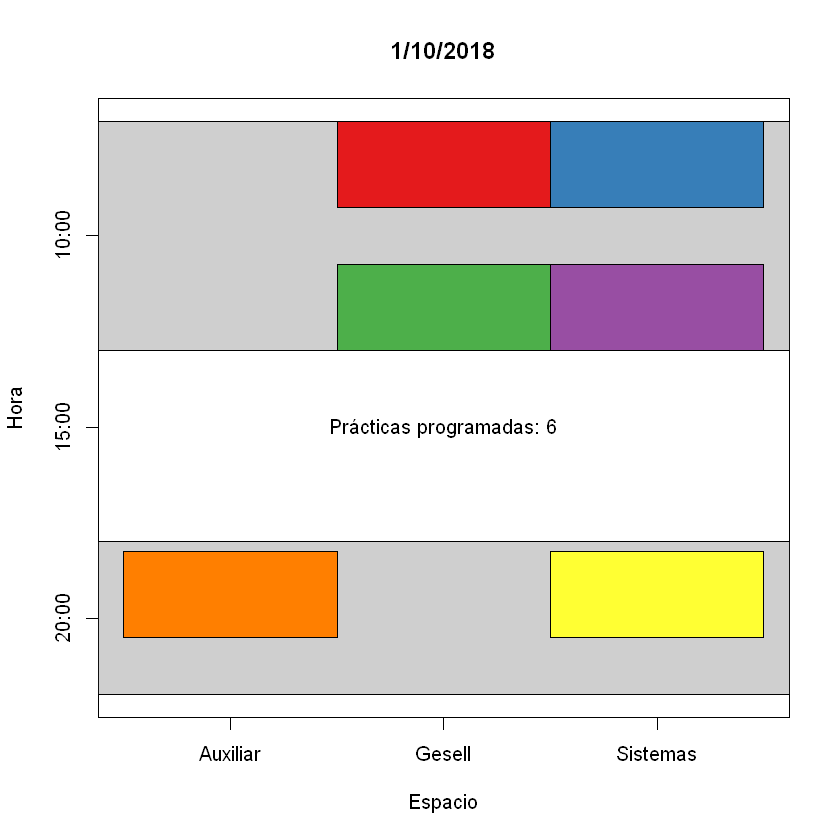

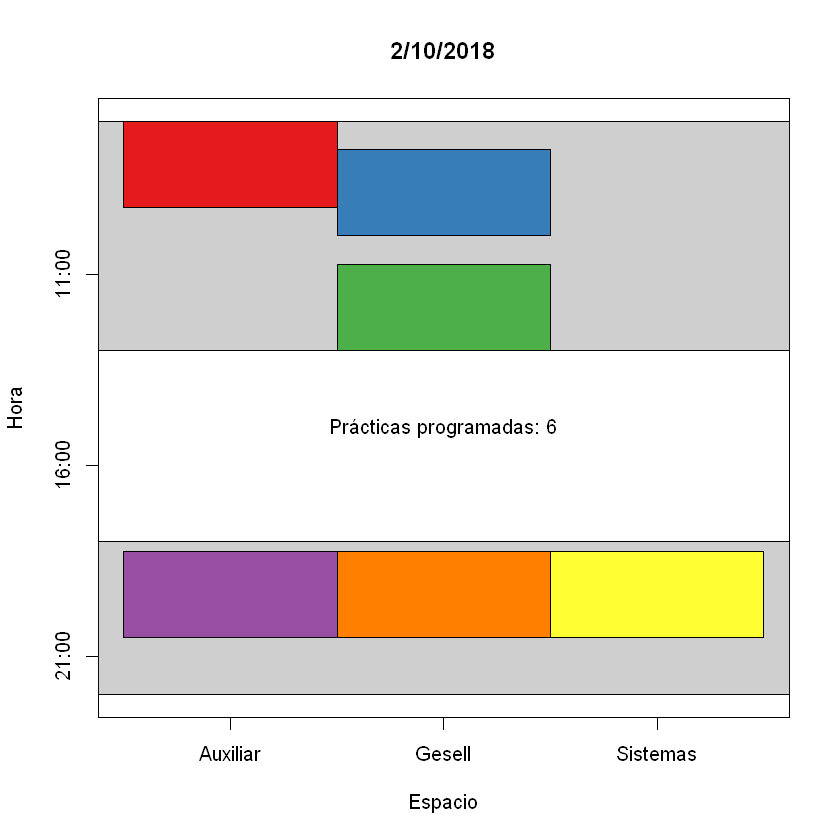

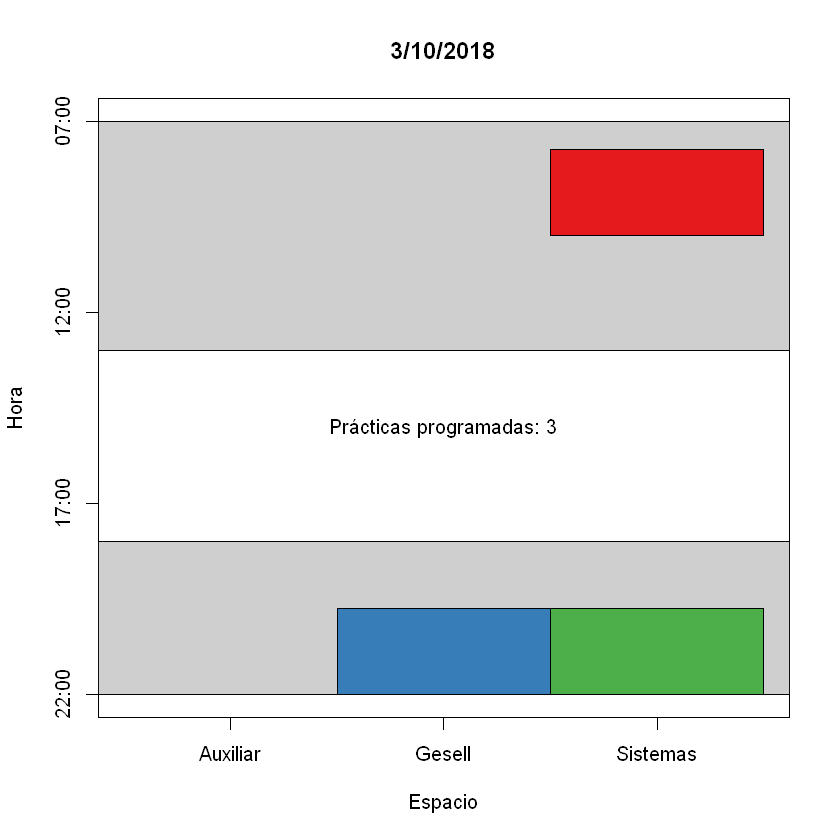

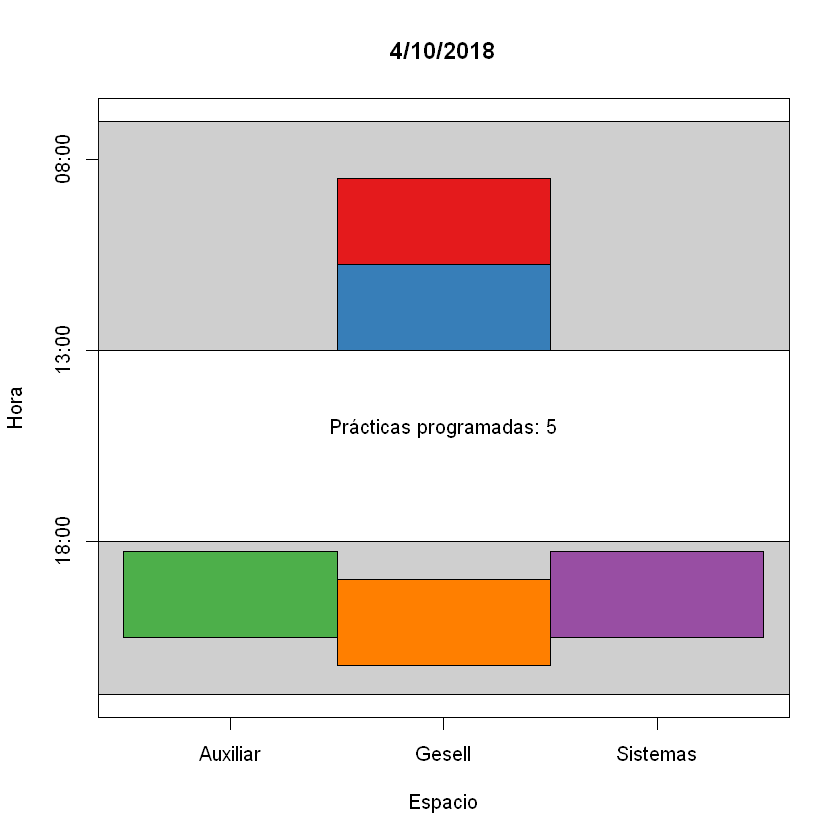

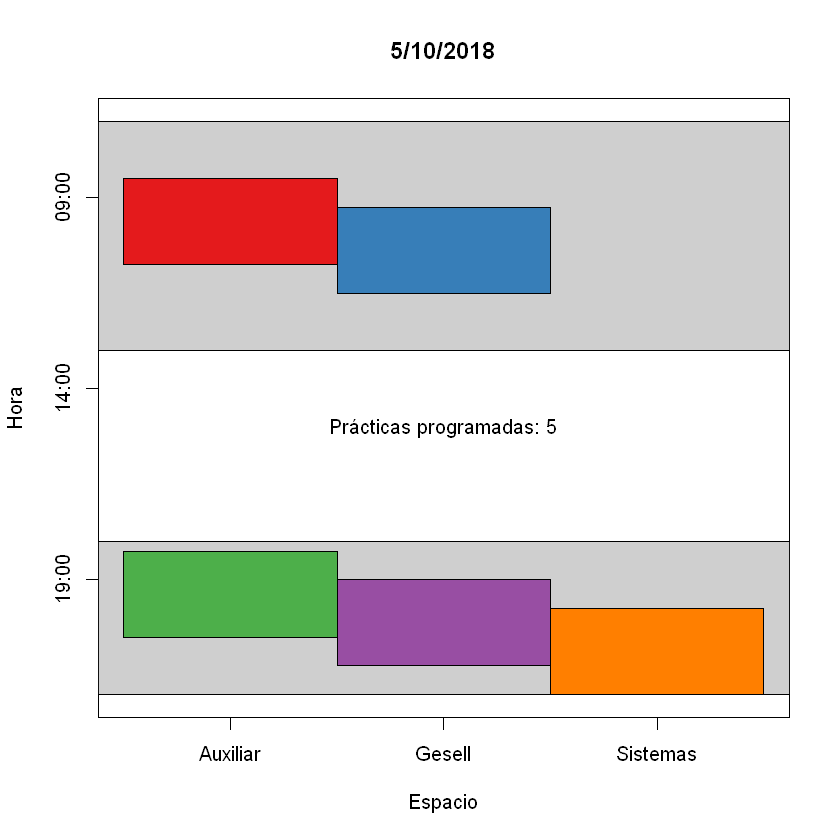

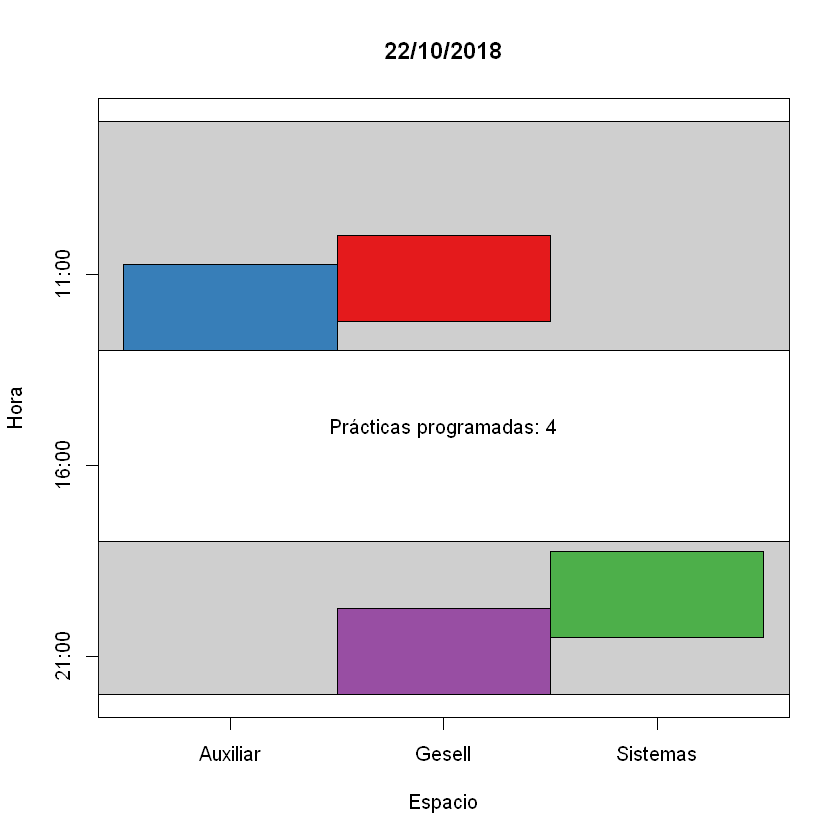

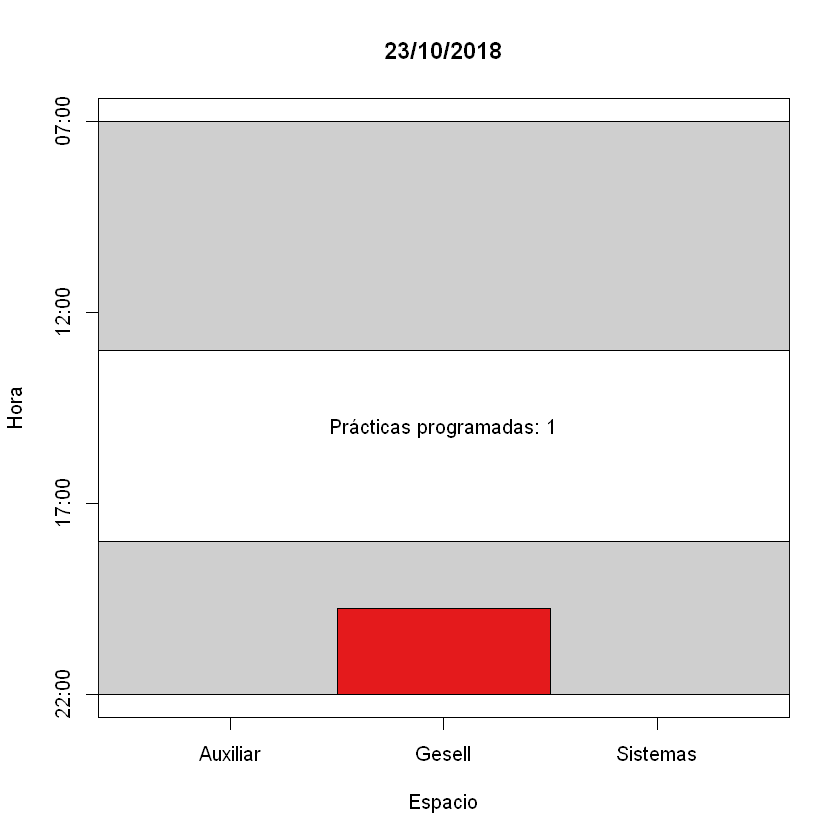

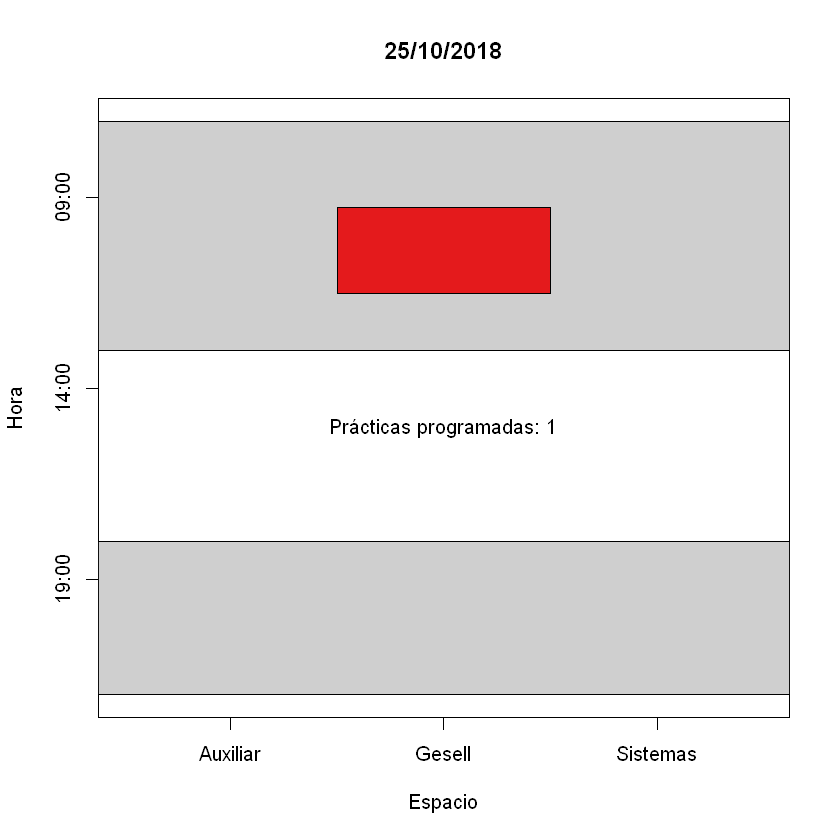

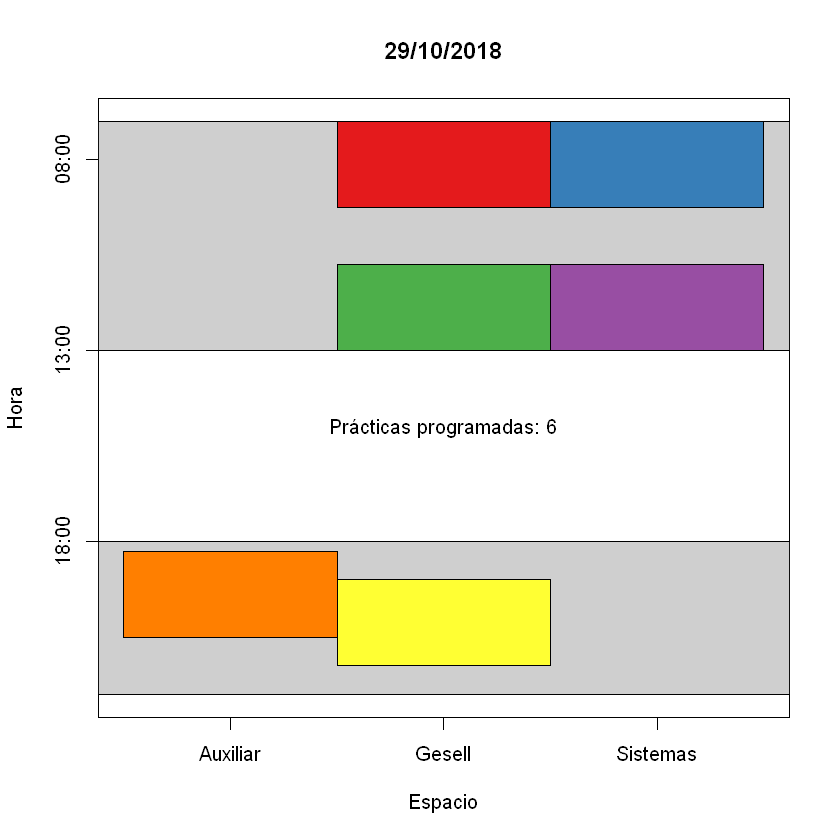

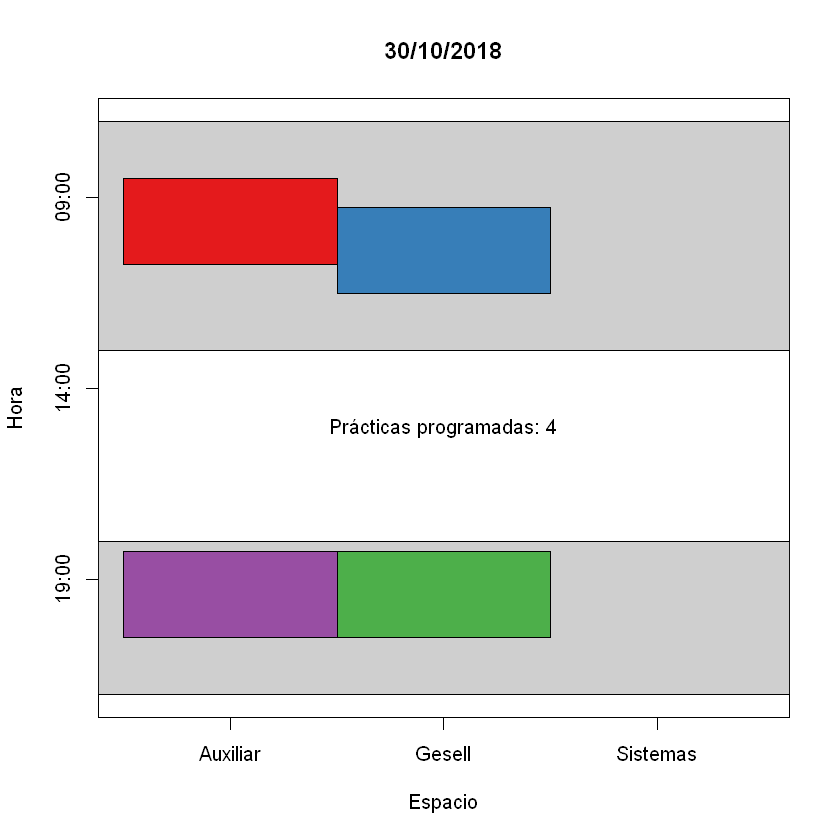

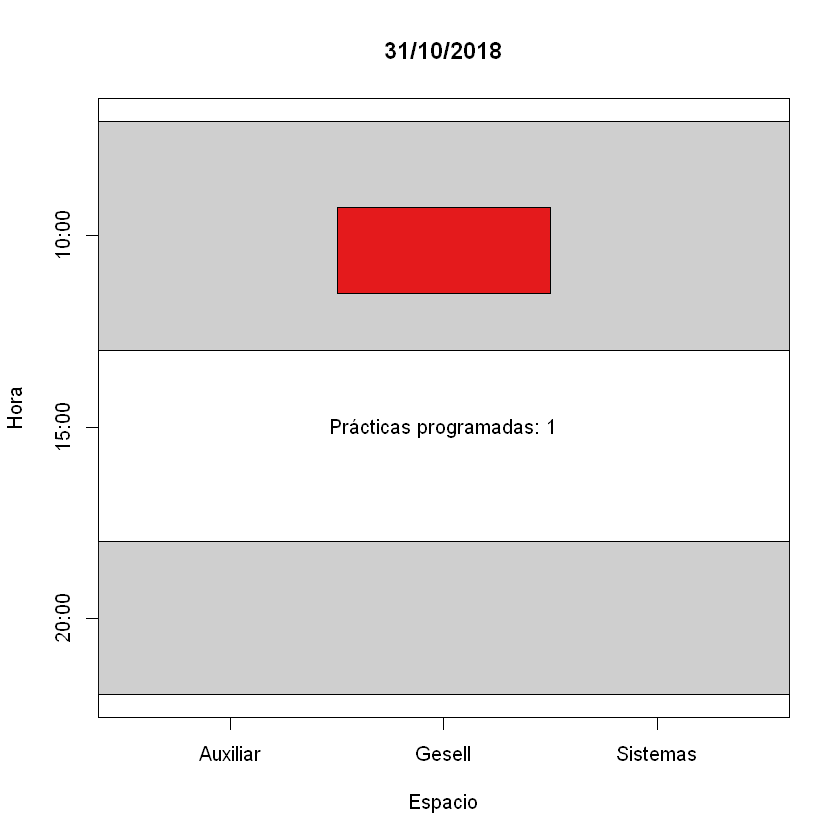

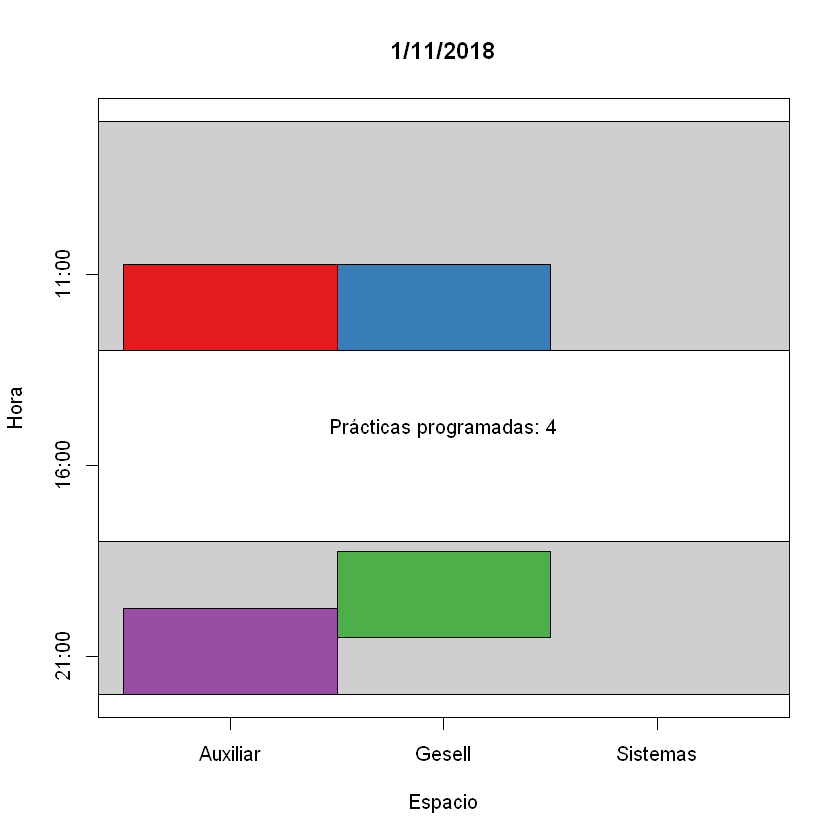

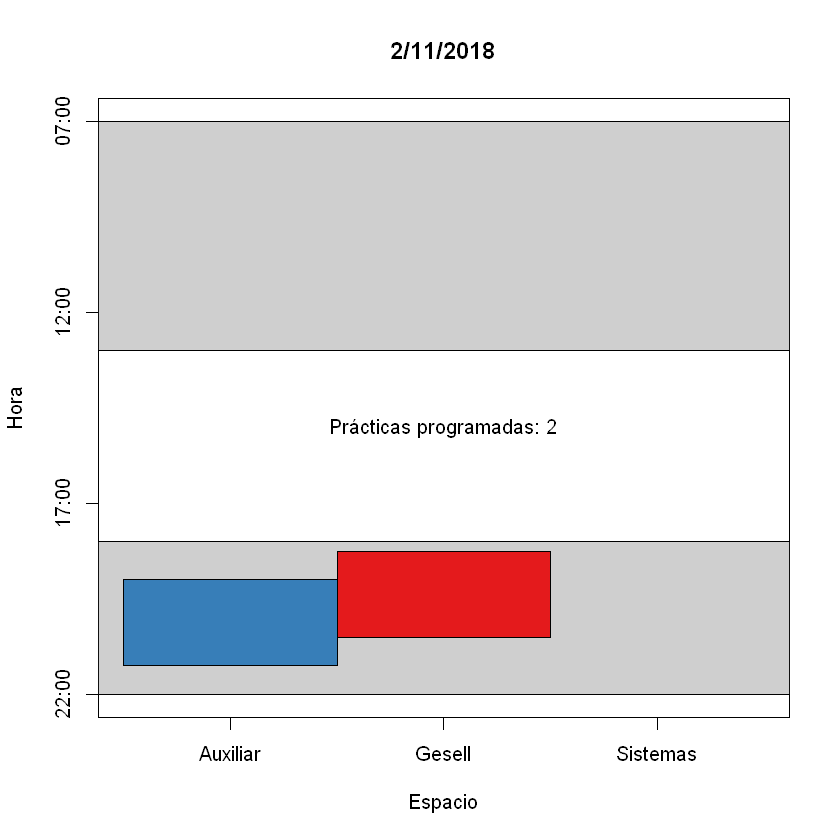

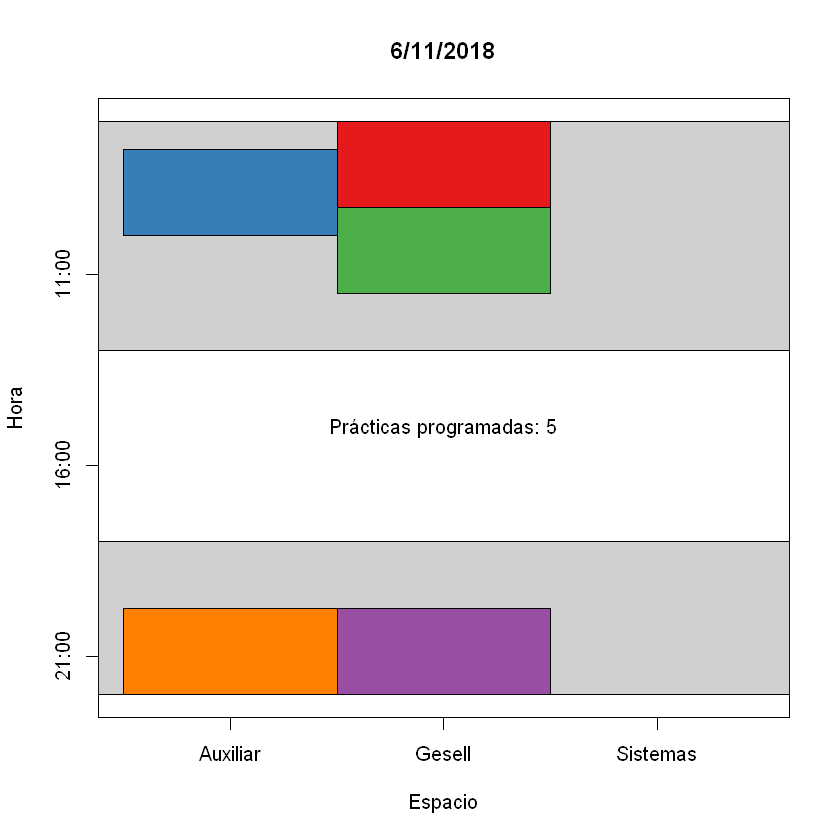

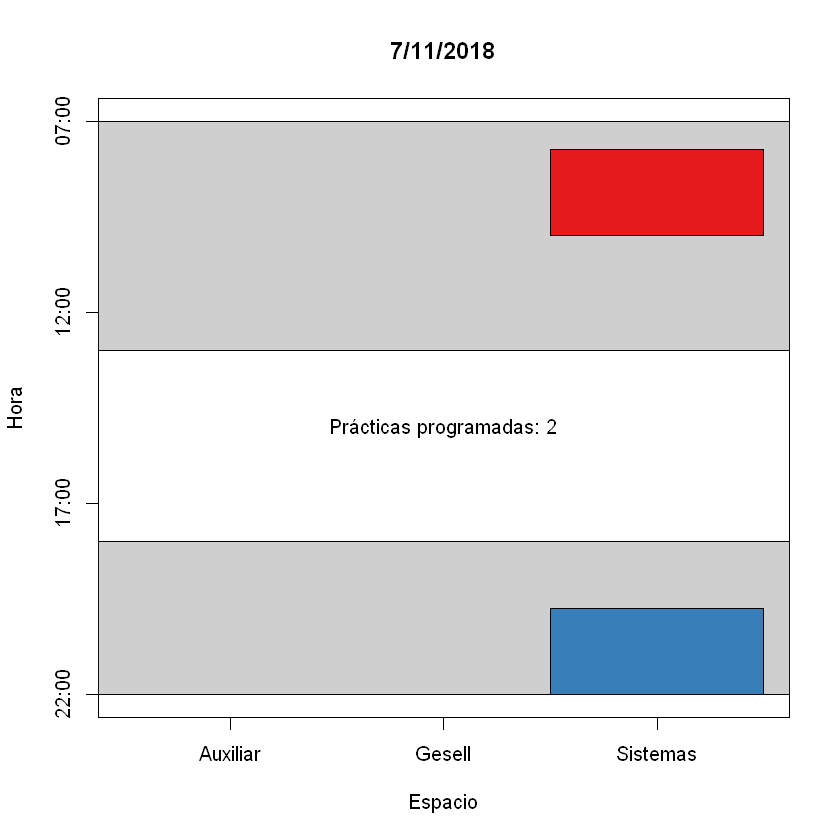

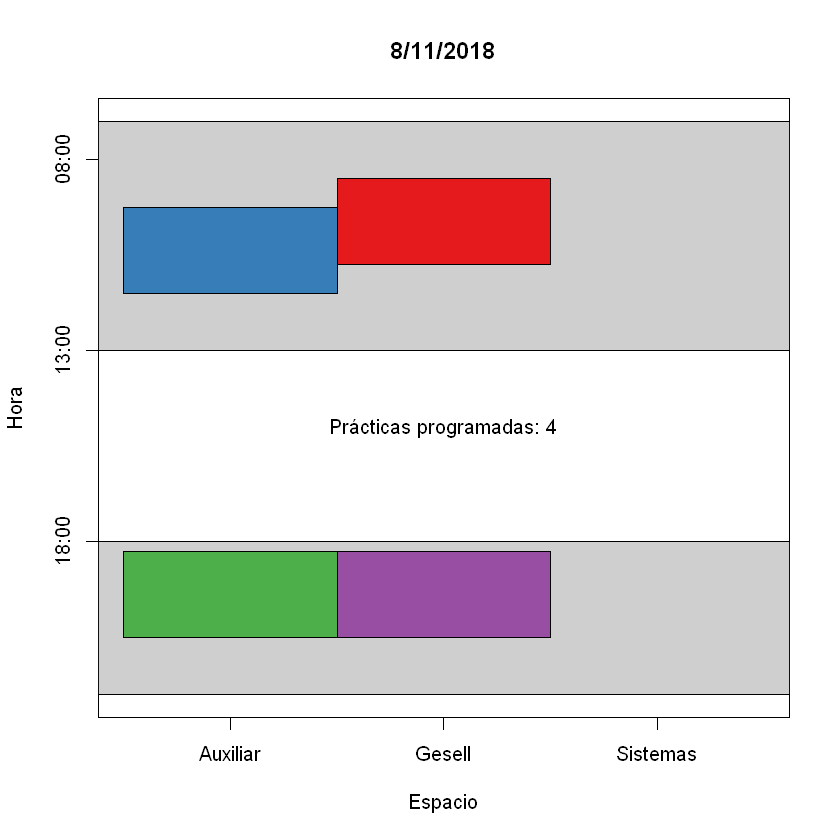

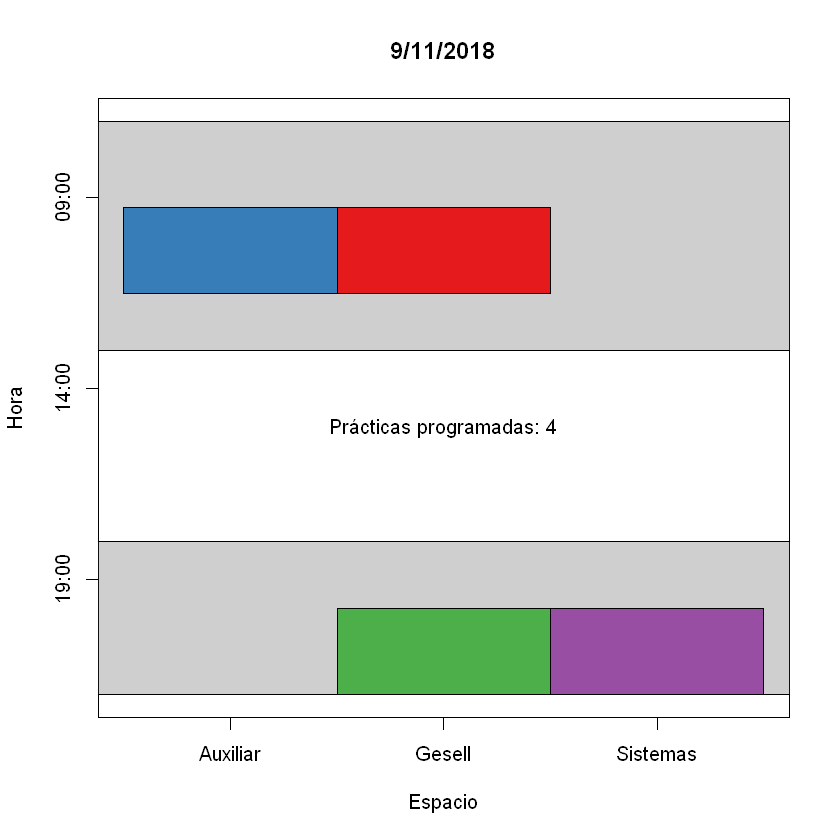

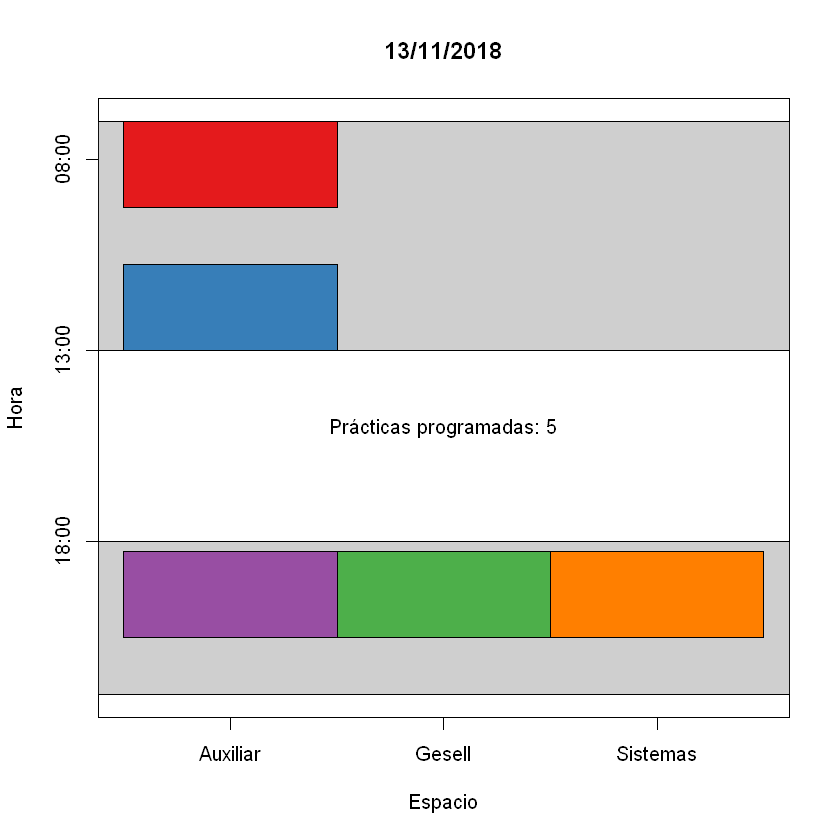

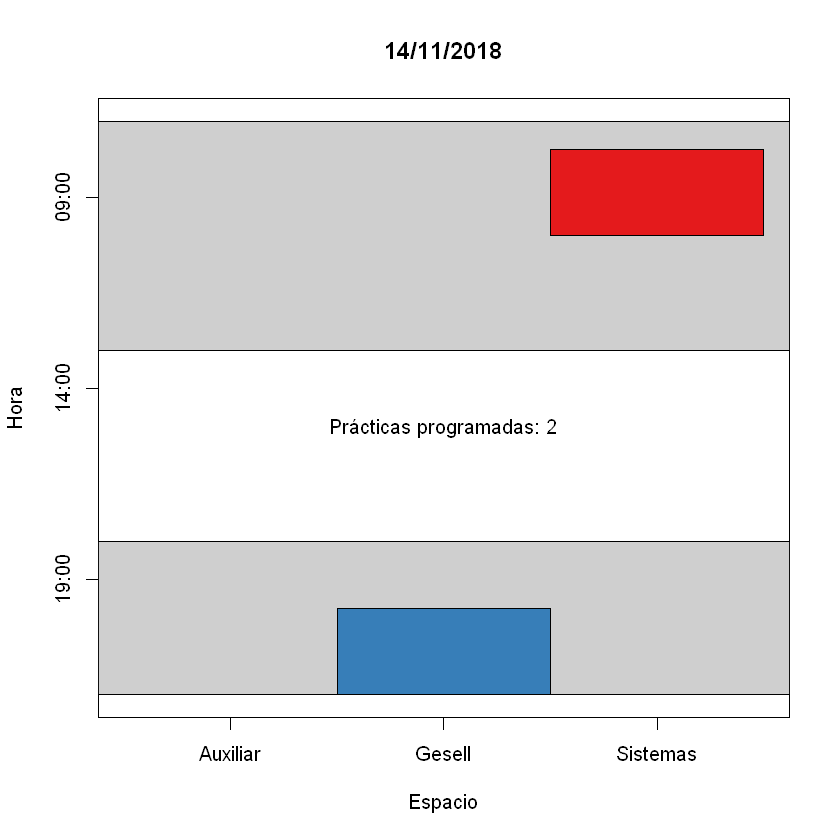

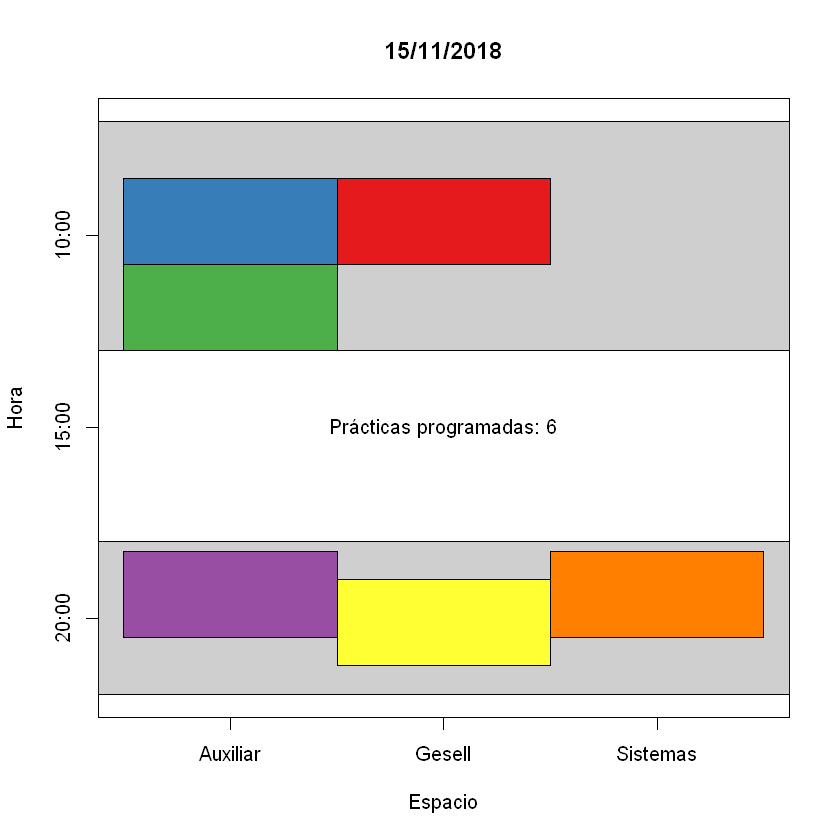

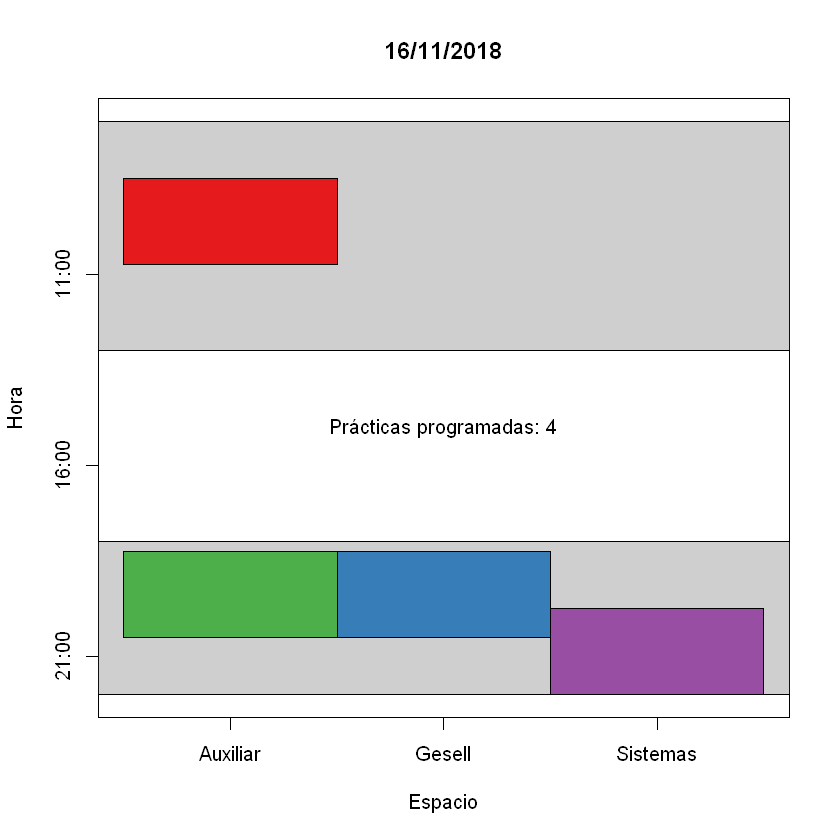

In [15]:
for (dia in unique(agendados$Fecha.1)){
    #X11()
    plot(y=strptime(paste(dia,"7:00:01"), "%d/%m/%Y %H:%M:%S"), x=2,pch=16,
         ylim=c(as.POSIXct(paste(dia,"22:00:00"), format="%d/%m/%Y %H:%M:%S"),
                as.POSIXct(paste(dia,"7:00:00"), format="%d/%m/%Y %H:%M:%S")),
         xlim=c(.5,3.5), col="white", main=dia, xlab="Espacio", ylab="Hora",xaxt = 'n')
    axis(labels=levels(agendados$Espacio),
         side = 1,
         at=1:3)

    rect(0,as.POSIXct(paste(dia,"13:00:00"), format="%d/%m/%Y %H:%M:%S"),
         4,as.POSIXct(paste(dia,"7:00:00"), format="%d/%m/%Y %H:%M:%S"),col=rgb(.25,.25,.25,.25))
    rect(0,as.POSIXct(paste(dia,"22:00:00"), format="%d/%m/%Y %H:%M:%S"),
         4,as.POSIXct(paste(dia,"18:00:00"), format="%d/%m/%Y %H:%M:%S"),col=rgb(.25,.25,.25,.25))
    pracs_dia=event_inic>=as.POSIXct(paste(dia,"6:30:00"), format="%d/%m/%Y %H:%M:%S")&
    event_inic<=as.POSIXct(paste(dia,"22:00:00"), format="%d/%m/%Y %H:%M:%S")
    ev_inic=event_inic[pracs_dia]
    ev_fin=event_fin[pracs_dia]
    spac=agendados$Espacio[pracs_dia]
    for (i in 1:length(pracs_dia)){
        rect(as.numeric(spac[i])-.5,ev_fin[i],
             as.numeric(spac[i])+.5,ev_inic[i],col=i)

    #     lines(y=c(ev_inic[i],ev_fin[i]),x=c(spac[i],spac[i]), col=i, lwd=5)
    #     points(y=ev_inic[i],x=spac[i], pch=2, col=i)
    #     points(y=ev_fin[i],x=spac[i], pch=6, col=i)
    }
    text(2,strptime(paste(dia,"15:00:00"), "%d/%m/%Y %H:%M:%S"),paste("Prácticas programadas:",sum(pracs_dia)))
}
